**Machine Learning Tutorial using Physicochemical Properties of Protein Tertiary Structure Data Set**

The workflow followed here is adapted from the book [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://g.co/kgs/bvvihi) by **Aurélien Geron**.

*The dataset is downloaded from this link [Physicochemical Properties of Protein Tertiary Structure Data Set](https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure).* 

*The tutorial is divided into three sections:*
> 1. *Data preprocessing. Explore the dataset for statistical attributes*
> 2. *Fit a linear model and evaluate performance*
> 3. *Project the feature space onto a reduced one with at least 99% of variance preserved*
> 4. *Fit a linear model on the reduced features and evaluate performance*

# Exploratory Data Analysis and Preprocessing

Load all the relevant modules. Load the data into pandas dataframe

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('default')
%matplotlib inline

In [74]:
casp = pd.read_csv("CASP.csv")
casp.head()

RMSD        F1       F2       F3        F4            F5        F6  \
0  17.284  13558.30  4305.35  0.31754  162.1730  1.872791e+06  215.3590   
1   6.021   6191.96  1623.16  0.26213   53.3894  8.034467e+05   87.2024   
2   9.275   7725.98  1726.28  0.22343   67.2887  1.075648e+06   81.7913   
3  15.851   8424.58  2368.25  0.28111   67.8325  1.210472e+06  109.4390   
4   7.962   7460.84  1736.94  0.23280   52.4123  1.021020e+06   94.5234   

        F7   F8       F9  
0  4287.87  102  27.0302  
1  3328.91   39  38.5468  
2  2981.04   29  38.8119  
3  3248.22   70  39.0651  
4  2814.42   41  39.9147

Let us start with collecting all the useful statistics from the dataset. These built-in pandas functions will be very useful for this

In [75]:
casp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45730 entries, 0 to 45729
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RMSD    45730 non-null  float64
 1   F1      45730 non-null  float64
 2   F2      45730 non-null  float64
 3   F3      45730 non-null  float64
 4   F4      45730 non-null  float64
 5   F5      45730 non-null  float64
 6   F6      45730 non-null  float64
 7   F7      45730 non-null  float64
 8   F8      45730 non-null  int64  
 9   F9      45730 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 3.5 MB


In [76]:
casp.describe()

RMSD            F1            F2            F3            F4  \
count  45730.000000  45730.000000  45730.000000  45730.000000  45730.000000   
mean       7.748528   9871.596995   3017.367175      0.302392    103.492433   
std        6.118312   4058.138034   1464.324663      0.062886     55.424985   
min        0.000000   2392.050000    403.500000      0.092500     10.310100   
25%        2.305000   6936.680000   1979.045000      0.258740     63.563900   
50%        5.030000   8898.805000   2668.155000      0.300150     87.740800   
75%       13.379000  12126.150000   3786.410000      0.342890    133.646750   
max       20.999000  40034.900000  15312.000000      0.577690    369.317000   

                 F5            F6             F7            F8            F9  
count  4.573000e+04  45730.000000   45730.000000  45730.000000  45730.000000  
mean   1.368299e+06    145.638061    3989.755990     69.975071     34.523664  
std    5.640367e+05     69.999230    1993.574575     56.493443      5.979755  
min    3.194902e+05     31.970400       0.000000      0.000000     15.228000  
25%    9.535912e+05     94.757500    3165.322500     31.000000     30.424725  
50%    1.237219e+06    126.176000    3840.170000     54.000000     35.299300  
75%    1.690920e+06    181.468500    4644.192500     91.000000     38.870800  
max    5.472011e+06    598.408000  105948.170000    350.000000     55.300900

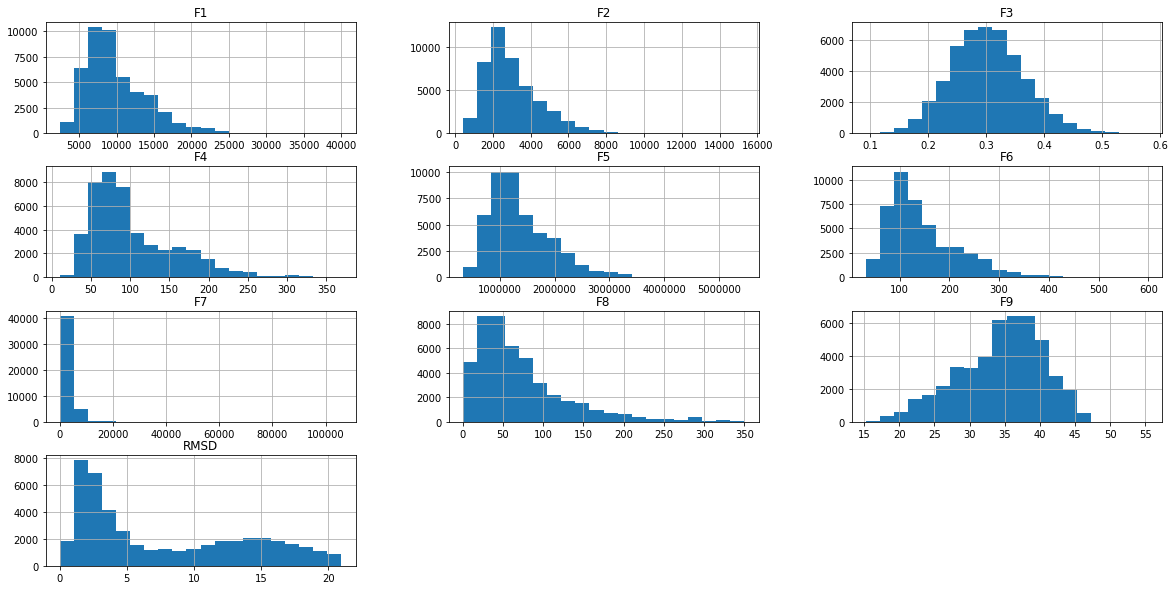

In [77]:
casp.hist(bins=20, figsize=(20,10));

One thing we notice is that, F7 has tail heavy distribution. We will need to deal with it. Let us see if there is any missing data in the dataset

In [78]:
np.any(casp.values == np.nan)

False

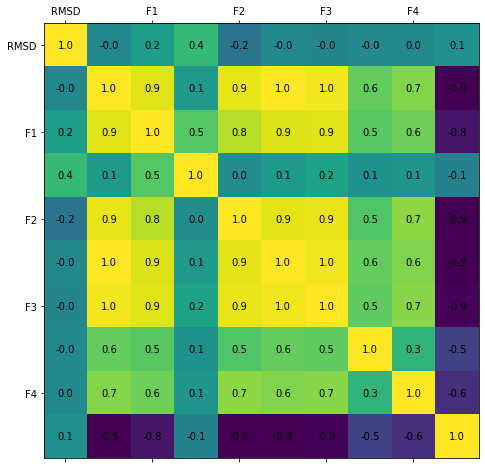

In [79]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(casp.corr(), interpolation='none')

for (i, j), value in np.ndenumerate(casp.corr()):
    plt.text(i, j, f"{value:.1f}", va="center", ha="center")

ax.set_xticklabels(['']+list(casp));
ax.set_yticklabels(['']+list(casp));

In [80]:
casp.corr()['RMSD'].sort_values(ascending=False)

RMSD    1.000000
F3      0.374309
F2      0.156895
F9      0.062830
F8      0.000344
F7     -0.003339
F5     -0.013982
F1     -0.015087
F6     -0.036135
F4     -0.169771
Name: RMSD, dtype: float64

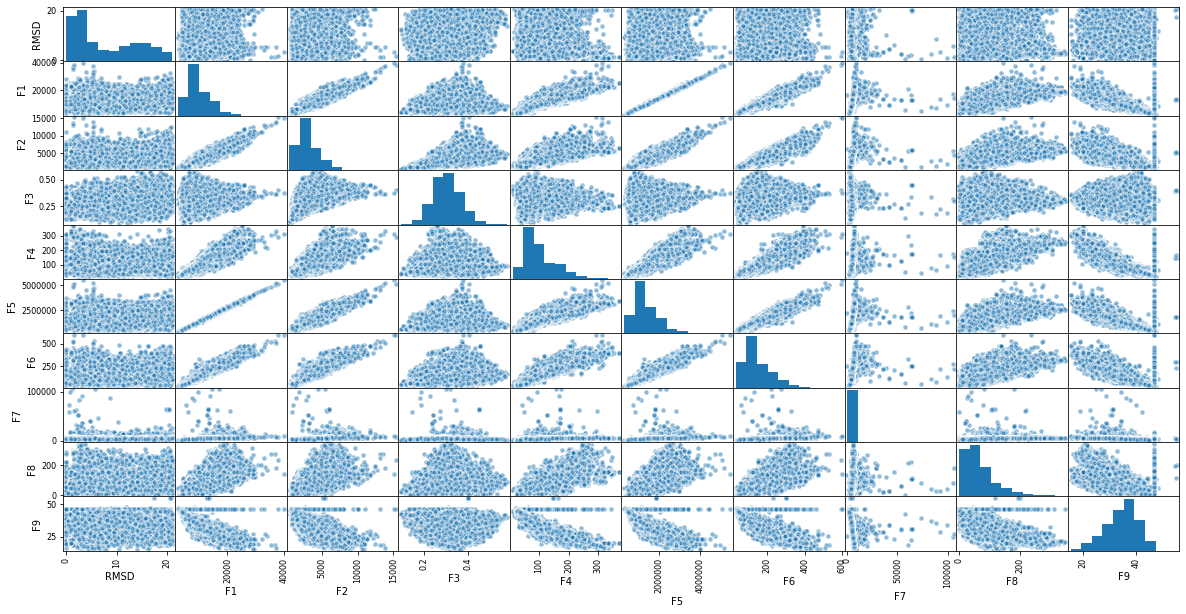

In [81]:
pd.plotting.scatter_matrix(casp, figsize=(20,10), edgecolors='w', s=100);

Let us spend some time on this plot and discuss what we see:

1. The target value in this case, `RMSD` is not seen to be linearly correlating with any of the features. 
2. Some of the features are very well correlated with each other. For example, `F1`, `F2`, `F4`, `F5` and `F6` seems to positively correlated. It is worthwhile to spend time in reducing the dimensionality of this data for better results.
3. From the correlations plots, let us pay more attention to feature `F9`. It can be easily noted that the values near ~50 have been capped artificially. Similarly For `RMSD`, the data is artificially capped close to 0.1. It is suggested to take a closer look at the data collection method. At this point, it is good to get rid of this data.
4. If you pay more attention to `F7`, you will notice that this is a highly tail-heavy distribution and it would be worthwhile to explore more about this.

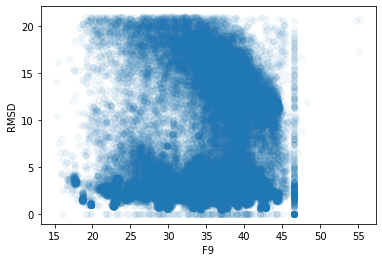

In [82]:
plt.scatter(casp["F9"], casp["RMSD"], alpha=0.05);
plt.xlabel("F9");
plt.ylabel("RMSD");

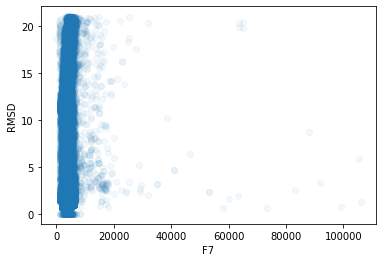

In [83]:
plt.scatter(casp["F7"], casp["RMSD"], alpha=0.05);
plt.xlabel("F7");
plt.ylabel("RMSD");

Let us for now get rid of this spurious data

In [84]:
casp_cleaned = casp[casp['F9']<46]
casp_cleaned = casp_cleaned[casp_cleaned["RMSD"] > 0.1]
casp_cleaned = casp_cleaned.reset_index().drop("index", axis=1)
casp_cleaned = casp_cleaned[casp_cleaned["F7"] < 8000]
casp_cleaned = casp_cleaned[casp_cleaned["F7"] >0.2]

In [85]:
casp_cleaned = casp_cleaned.reset_index()

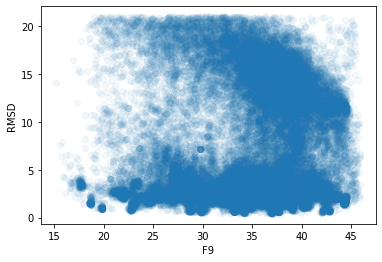

In [86]:
plt.scatter(casp_cleaned["F9"], casp_cleaned["RMSD"], alpha=0.05);
plt.xlabel("F9");
plt.ylabel("RMSD");

In [87]:
min(casp_cleaned["F3"]),max(casp_cleaned["F3"])

(0.0925, 0.5776899999999999)

In [88]:
casp_cleaned["F3_cat"] = pd.cut(casp_cleaned["F3"], 
                                bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, np.inf],
                                labels = [1, 2, 3, 4, 5, 6])

In [89]:
casp_cleaned["F3_cat"].value_counts()/len(casp_cleaned)

3    0.455119
4    0.433048
5    0.064825
2    0.044769
6    0.002171
1    0.000067
Name: F3_cat, dtype: float64

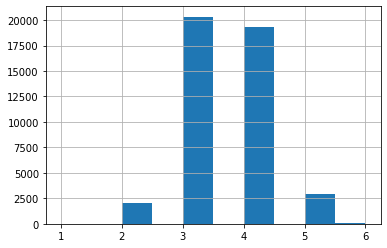

In [90]:
casp_cleaned["F3_cat"].hist()

In [91]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(casp_cleaned, casp_cleaned["F3_cat"]):
    casp_train_set = casp_cleaned.loc[train_index]
    casp_test_set = casp_cleaned.loc[test_index]

In [92]:
casp_train_set["F3_cat"].value_counts()/len(casp_train_set)

3    0.455105
4    0.433056
5    0.064831
2    0.044769
6    0.002182
1    0.000056
Name: F3_cat, dtype: float64

In [93]:
for set_ in (casp_train_set, casp_test_set):
    set_.drop("F3_cat", axis=1, inplace = True)

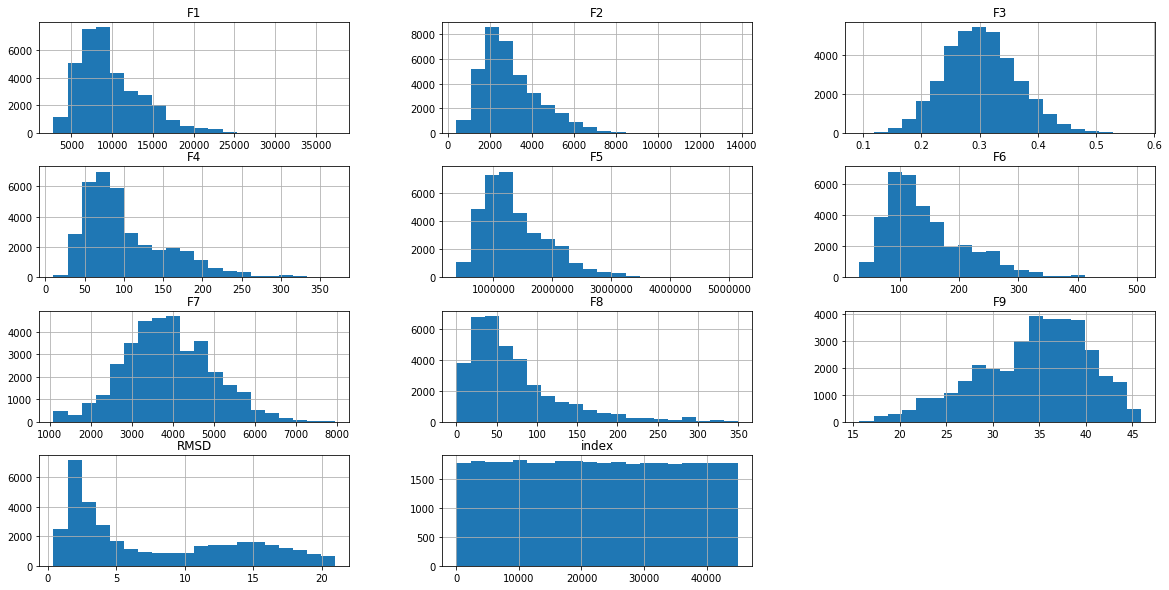

In [94]:
casp_train_set.hist(bins=20, figsize=(20,10));

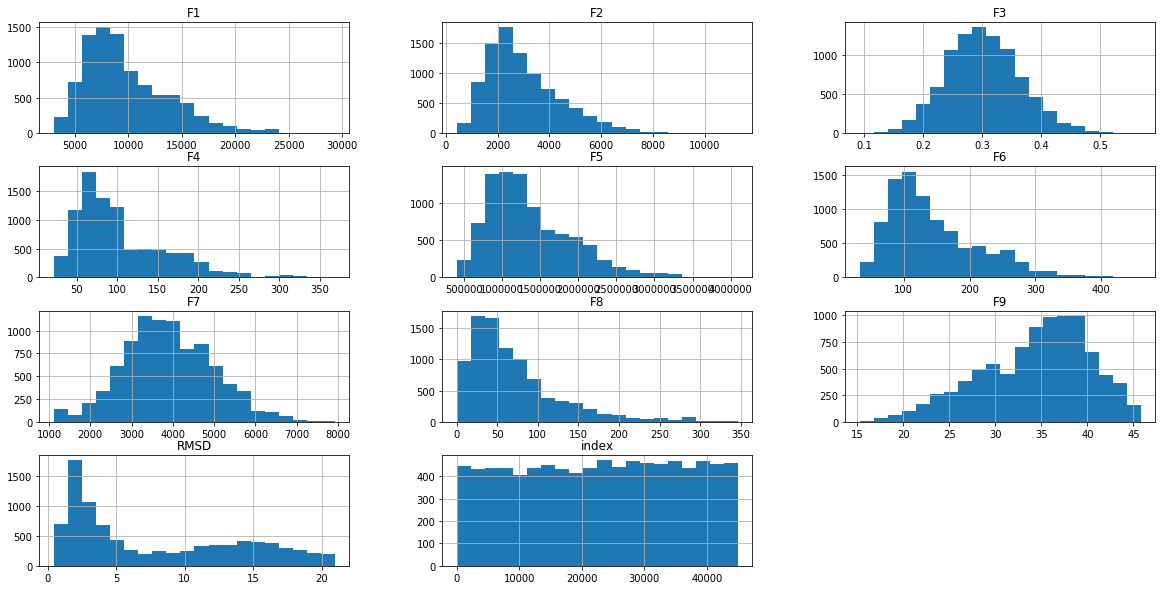

In [95]:
casp_test_set.hist(bins=20, figsize=(20,10));

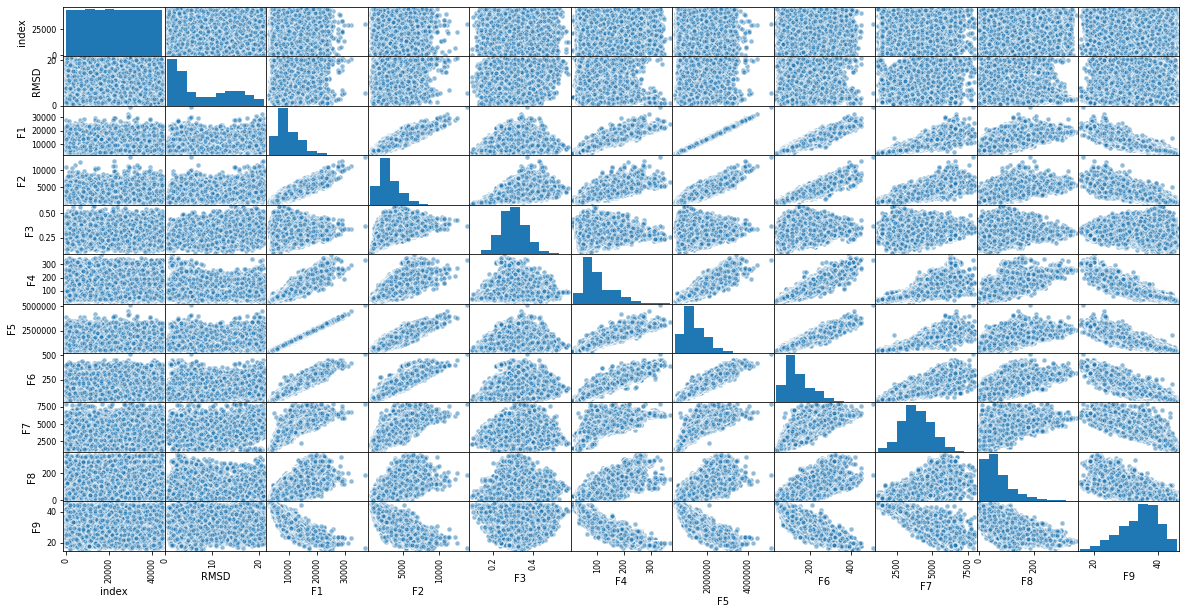

In [96]:
pd.plotting.scatter_matrix(casp_train_set, figsize=(20,10), edgecolors='w', s=100);

Split the data into training set and test set

In [97]:
X_train, y_train = casp_train_set.drop("RMSD", axis=1),casp_train_set["RMSD"]
X_test, y_test = casp_test_set.drop("RMSD", axis=1),casp_test_set["RMSD"]

The data exists on a different scales and we need to use a scaler model to fit it

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipeline = Pipeline([
    ('std_scaler',StandardScaler()),
    ('pca', PCA(n_components=0.99))
])

X_train_scaled = pipeline.fit_transform(X_train)

# Regression

We can start with linear regression so that we have a baseline to compare the other models with.

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import time
lin_reg = LinearRegression();

start_time = time.time()
lin_reg.fit(X_train_scaled, y_train)
print('Time taken ' + str(time.time() - start_time))

Time taken 0.009773969650268555


In [100]:
def plot_results(X, y, model, name):
    plt.figure(figsize=(5,5))
    y_pred = model.predict(X)
    plt.scatter(y_pred,y, alpha=0.2)
    plt.plot([y_pred.min(),y_pred.max()],[y_pred.min(),y_pred.max()],'k')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title("R2 Score = " +str(round(r2_score(model.predict(X), y),2))+ '    '+ 
              "RMSE = "+ str(round(np.sqrt(mean_squared_error(model.predict(X),y)),2)))
    plt.savefig(name+'.svg', format='svg')

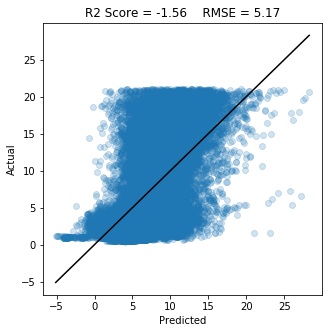

In [101]:
plot_results(X_train_scaled, y_train, lin_reg, "")

In [102]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X_train_scaled, y_train, scoring = "neg_mean_squared_error", cv=5)

In [103]:
def display_scores(scores):
    print("Scores: ", scores);
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [104]:
display_scores(np.sqrt(-scores))

Scores:  [5.14971338 5.16721465 5.21889175 5.12286033 5.18988847]
Mean:  5.169713719685094
Standard Deviation:  0.03294540404239061


Let us use the random forest regression model for this problem and see if that is better in terms of prediction accuracy

In [105]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_scaled, y_train);

In [106]:
scores= cross_val_score(forest_reg, X_train_scaled, y_train, scoring = "neg_mean_squared_error", cv=5)

In [107]:
display_scores(np.sqrt(-scores))

Scores:  [4.05882265 3.99753805 4.06776047 3.96885269 4.05160292]
Mean:  4.02891535798133
Standard Deviation:  0.038756092096469734


The random forest model is definitely better than linear regression model. Let us try to refine the model using Grid Search method

In [108]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [2, 5, 10]},
              {'bootstrap': [False], 'n_estimators': [2, 5, 10]}]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=3,scoring='neg_mean_squared_error',return_train_score=True)

In [109]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid=[{'n_estimators': [2, 5, 10]},
                         {'bootstrap': [False], 'n_estimators': [2, 5, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [110]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=10)

In [111]:
results = grid_search.cv_results_
for mean_scores, params in zip(results["mean_test_score"], results["params"]):
    print(np.sqrt(-mean_scores), params)

5.080315538149645 {'n_estimators': 2}
4.5163237666192835 {'n_estimators': 5}
4.2719328373526215 {'n_estimators': 10}
5.67218463201536 {'bootstrap': False, 'n_estimators': 2}
5.6128950590496896 {'bootstrap': False, 'n_estimators': 5}
5.599914654224878 {'bootstrap': False, 'n_estimators': 10}


In [112]:
best_model = grid_search.best_estimator_
best_model

RandomForestRegressor(n_estimators=10)

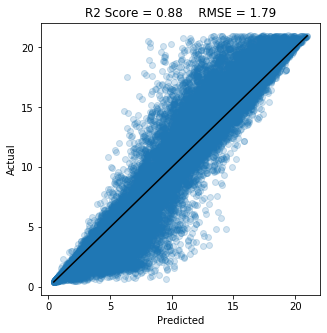

In [113]:
plot_results(X_train_scaled, y_train, best_model, "Best Model")

In [114]:
locs = np.where(abs(best_model.predict(X_train_scaled)-y_train)>3)[0]

colors = ['b']*casp_cleaned.shape[0]
for i in locs:
    colors[i] = 'r'

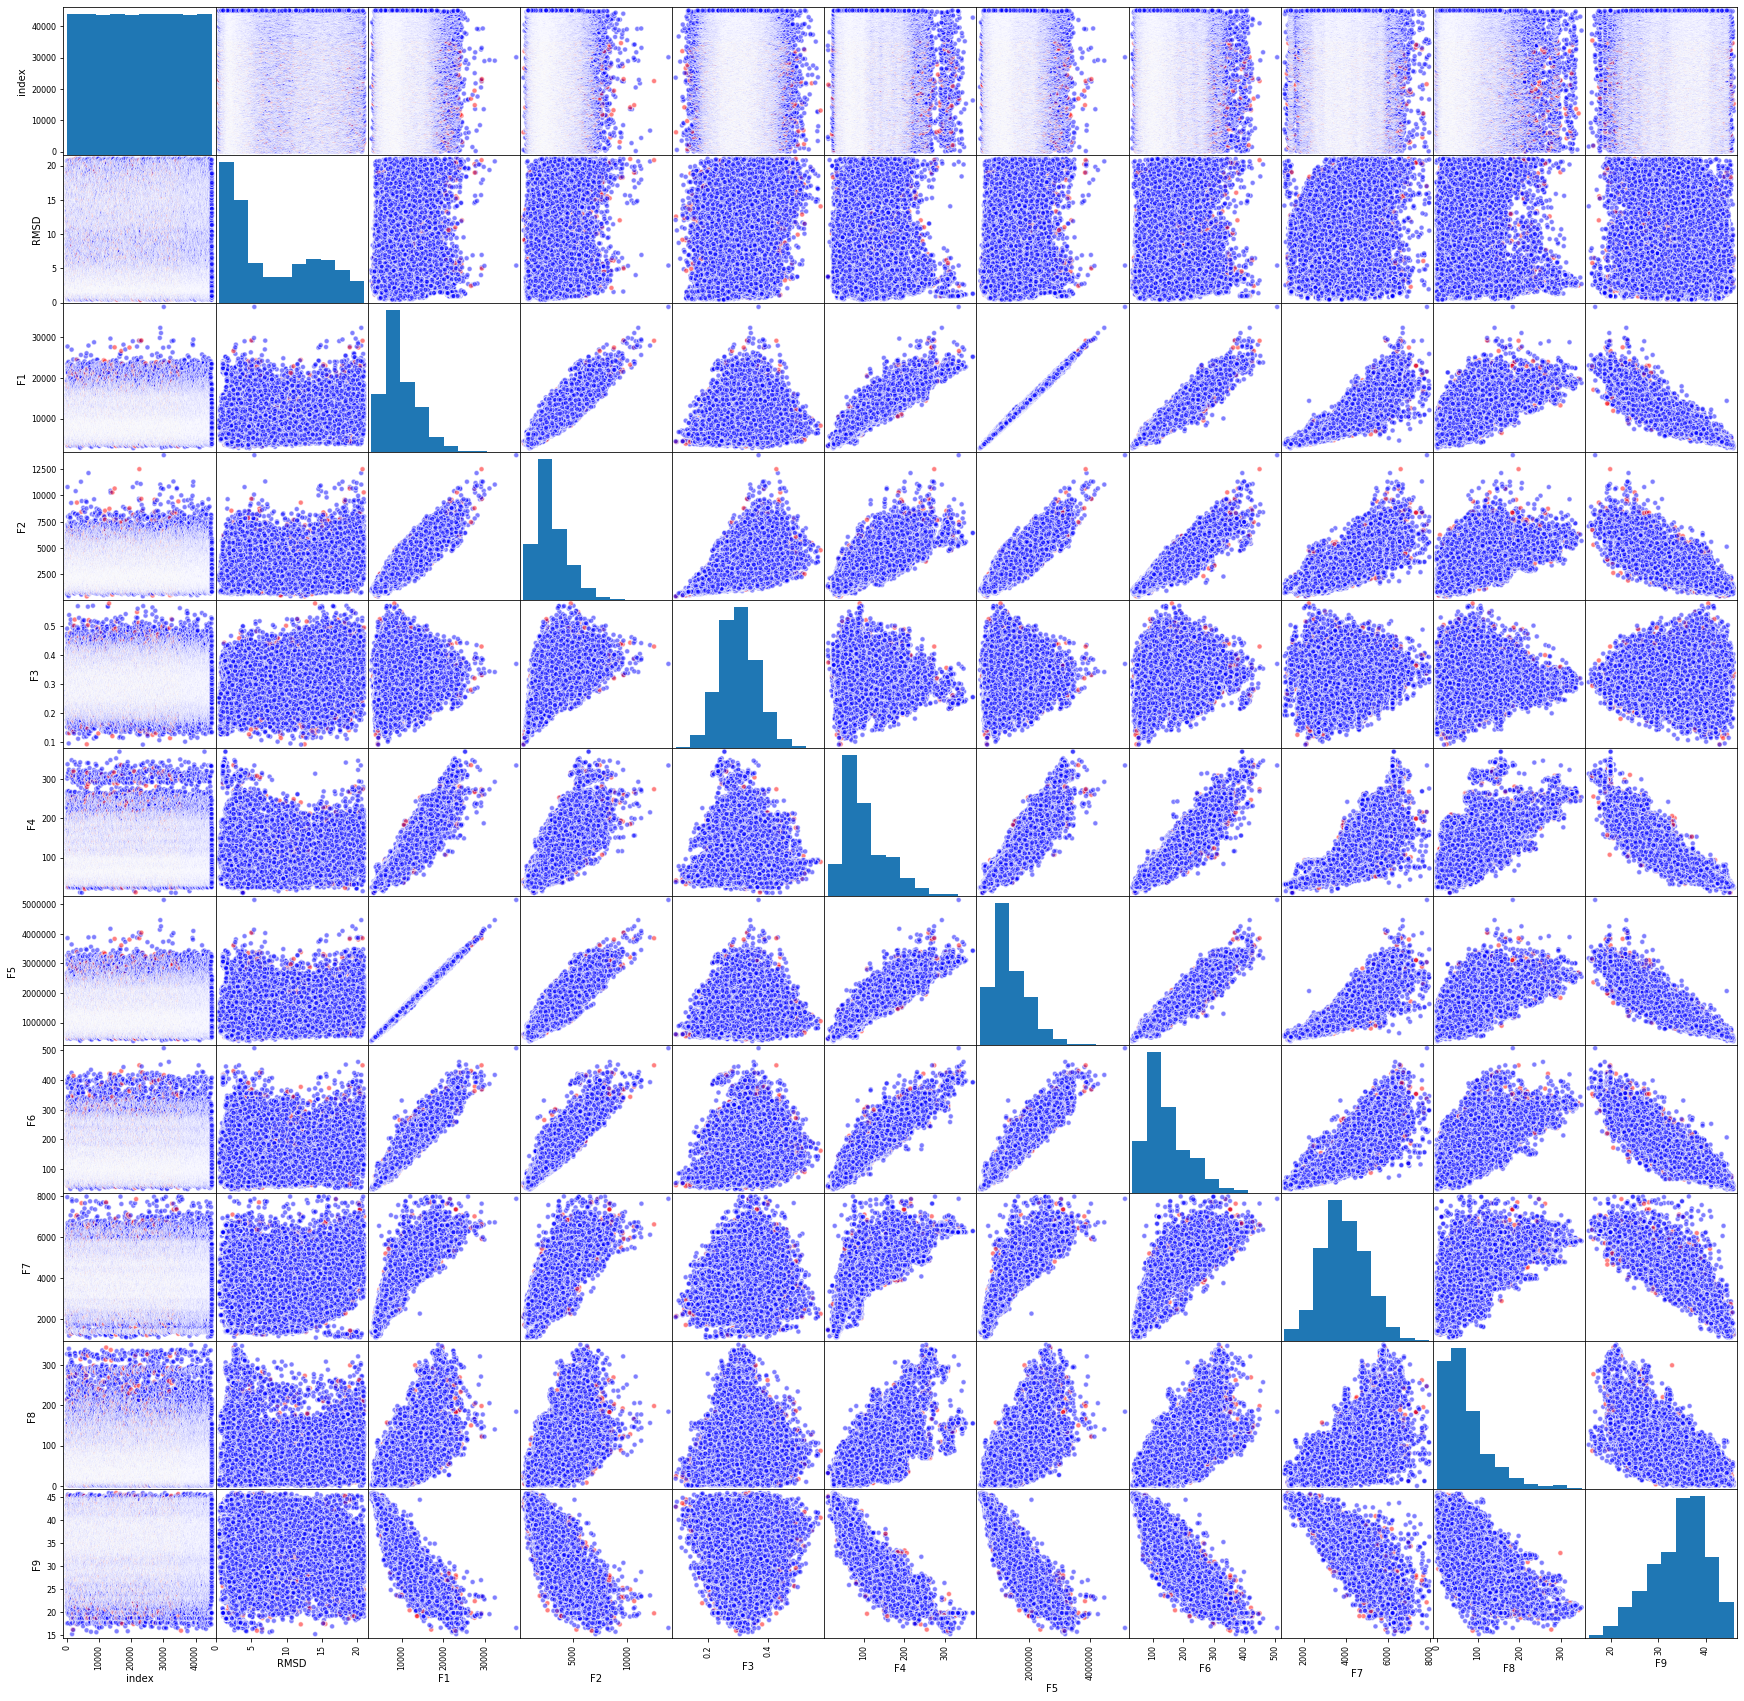

In [115]:
pd.plotting.scatter_matrix(casp_cleaned, figsize=(30,30), edgecolors='w', s=100, c=colors);

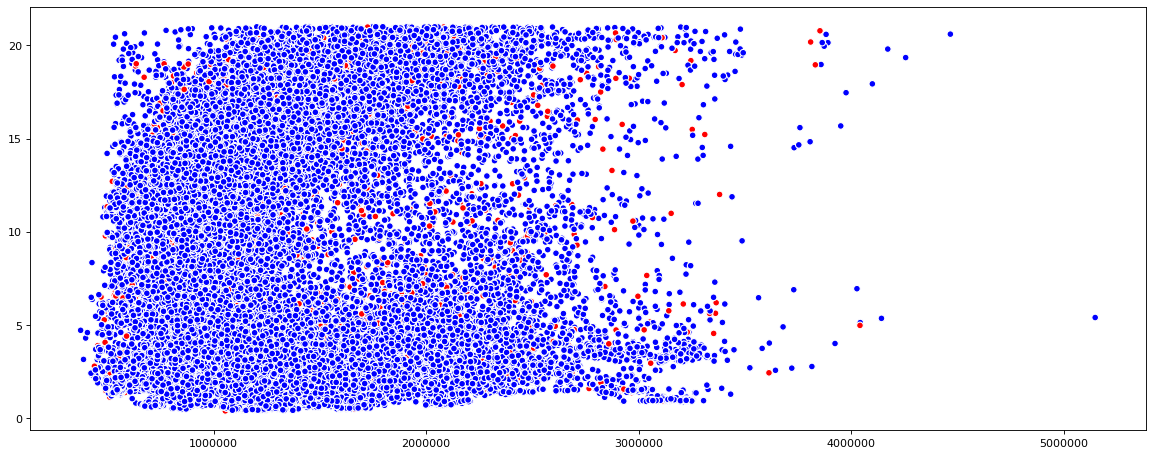

In [116]:
plt.figure(figsize=(18, 7), dpi=80)
plt.scatter(casp_cleaned["F5"], casp_cleaned["RMSD"], c=colors, edgecolors='w');

# Try with Neural Network

Let us also try and see if we can fit a neural network to this dataset.

In [117]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(hidden_layer_sizes=(100,10),tol=1e-3, 
                             max_iter=1000, 
                             random_state=42, 
                             learning_rate_init=5e-4, 
                             learning_rate='adaptive',
                             validation_fraction=0.3,
                             early_stopping=True)

In [118]:
mlp_regressor.fit(X_train_scaled, y_train)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(100, 10),
             learning_rate='adaptive', learning_rate_init=0.0005, max_iter=1000,
             random_state=42, tol=0.001, validation_fraction=0.3)

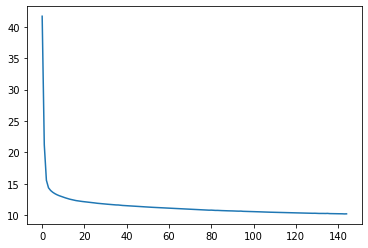

In [119]:
plt.plot(mlp_regressor.loss_curve_)

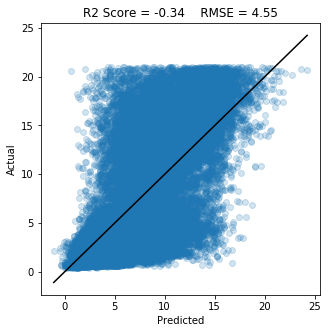

In [120]:
plot_results(X_train_scaled, y_train, mlp_regressor, "MLP Regressor")

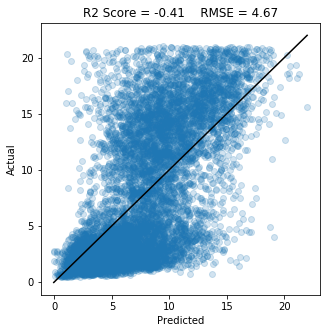

In [122]:
plot_results(X_test_scaled, y_test, mlp_regressor, "MLP test")

In [123]:
model = mlp_regressor
rmse_test = np.sqrt(mean_squared_error(model.predict(X_test_scaled),y_test))
rmse_train = np.sqrt(mean_squared_error(model.predict(X_train_scaled),y_train))
print("RMSE on train and test is ", rmse_train, rmse_test)

RMSE on train and test is  4.546074670425607 4.674116480052572
